In [1]:
import cv2
import glob
import numpy as np
from matplotlib import pyplot as plt

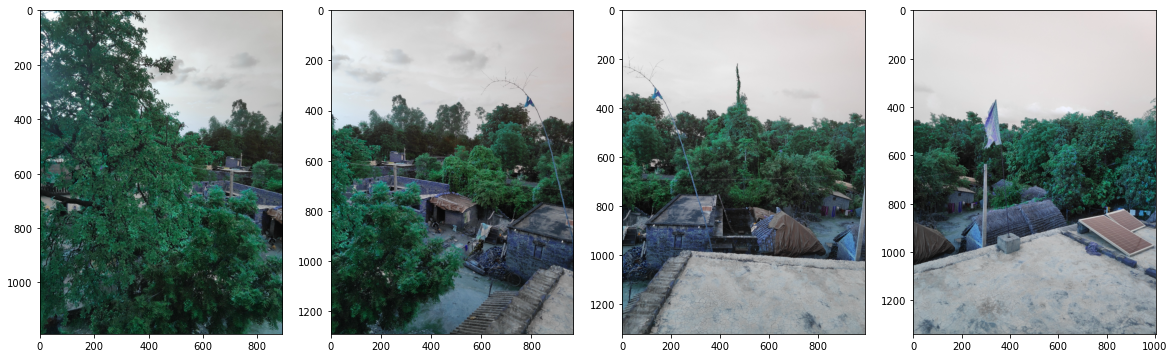

312
381


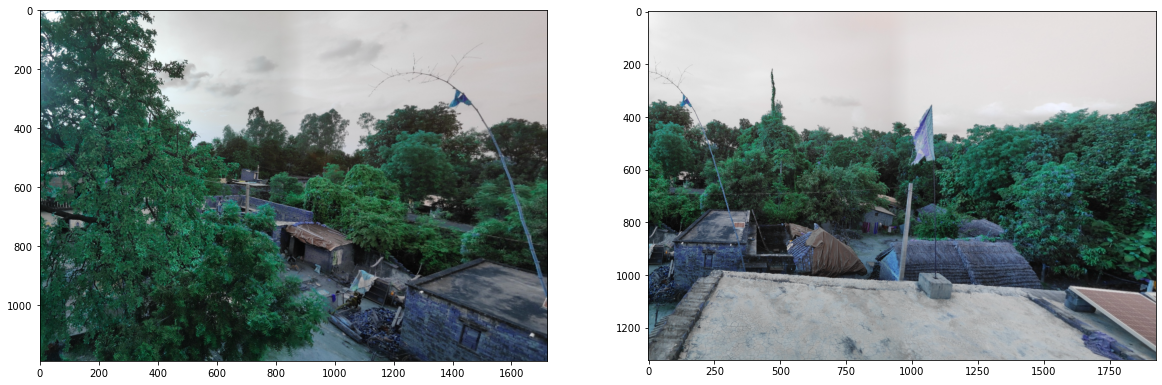

418


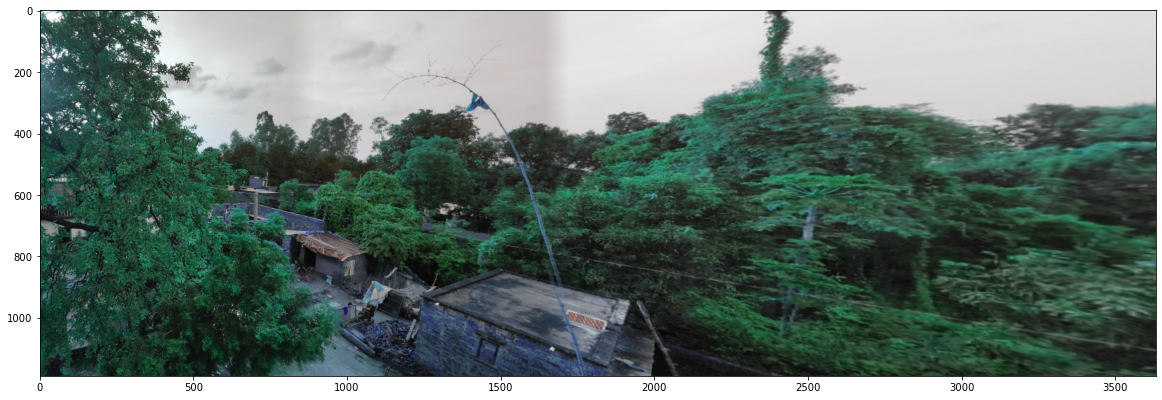

In [2]:

path1 = './images/img3.jpg'
path2 = './images/img4.jpg'
path3 = './images/img5.jpg'
path4 = './images/img6.jpg'

def resize(image):
    flag,min=False,image.shape[1]
    for i in range(image.shape[0]):
        for j in range(image.shape[1]-1,0,-1):
            if i+100<image.shape[0] and np.average(image[i:i+100,j])>30:
                if j<min:min=j
                break
      
    image=image[:,:(min-1)]
    return image


def feacture_matching(left,right):
    right=cv2.resize(right,(right.shape[1],left.shape[0]))
    left_gray = cv2.cvtColor(left,cv2.COLOR_BGR2GRAY)
    right_gray = cv2.cvtColor(right,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    left_kp, left_des = sift.detectAndCompute(left_gray,None)
    right_kp, right_des = sift.detectAndCompute(right_gray,None)
    m_f = cv2.BFMatcher()
    matches = m_f.knnMatch(left_des, right_des, k=2)

    best_m=[i for i,j in matches if i.distance<.7*j.distance]
    print(len(best_m))
    draw_params = dict(matchColor = (0,255,0), 
                   singlePointColor = None,
                   flags = 2)
    img3 = cv2.drawMatches(left,left_kp,right,right_kp,best_m,None,**draw_params)

    if len(best_m)>=4:
     
      right_p,left_p=[],[]
      for i in best_m:
        left_p.append(left_kp[i.queryIdx].pt)
        right_p.append(right_kp[i.trainIdx].pt)
      right_p=np.float32(right_p).reshape(-1,1,2)
      left_p=np.float32(left_p).reshape(-1,1,2)

      h_matrix,_=cv2.findHomography(right_p,left_p,cv2.RANSAC,5)
      image = cv2.warpPerspective(right,h_matrix,(left.shape[1] + right.shape[1], right.shape[0]))


      h,w,_=left.shape
      h1,w1,_=image.shape
      image=cv2.resize(image,(w1,h))
      length=80
      image[:,:w-length]=[0,0,0]
      image = resize(image)
      image1=np.zeros([image.shape[0],length,3])
      r1=np.arange(1,0,-1/length)
      r2=np.arange(0,1,1/length)
      for i in range(image.shape[0]):
        for r11,r22,j in zip(r1,r2,list(range(length))):
          image1[i,j,:]=np.multiply(r11,left[i,w-length+j])+np.multiply(r22,image[i,w-length+j])
        
      image[:,w-length:w]=image1
      image[:,:w-length]=left[:,:w-length]
      return image
    else: return "not enough matches found"

 

paths=[path1,path2,path3,path4]
images=[]
for i in paths:
  img=cv2.imread(i)
  img = cv2.resize(img, (0,0), fx=1, fy=1)
  images.append(img)

plt.figure(figsize=(20,80))
for idx,i in enumerate(images):
  plt.subplot(1,4,idx+1)
  plt.imshow(i)
plt.show()
img=images[0]
img_list1=images[:2]
img_list2=images[2:4]
f1=feacture_matching(img_list1[0],img_list1[1])
f2=feacture_matching(img_list2[0],img_list2[1])
results=[f1,f2]
plt.figure(figsize=(20,80))
for idx,i in enumerate(results):
  plt.subplot(1,2,idx+1)
  plt.imshow(i)
plt.show()
f3=feacture_matching(f1,f2)
plt.figure(figsize=(20,60))
plt.imshow(f3)
plt.show()